<a href="https://colab.research.google.com/github/kaylanelira/sistemas-inteligentes/blob/main/Mini_projeto_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINI-PROJETO ÁRVORES DE DECISÃO**


---


Grupo:
- [Kaylane Lira (kgl)](https://github.com/kaylanelira)
- [Luan Eustáquio (lelf)](https://github.com/luaneustaquio)
- [Otávio Francisco (ohbf)](https://github.com/otavio-hbf)
- [Pedro Basílio (pbgs2)](https://github.com/Pbgsa)
- [Thiago Ramalho (trm4)](https://github.com/Thiago-Ramalho)

## **IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
!git clone 'https://github.com/kaylanelira/datasets.git'
%cd datasets

Cloning into 'datasets'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 36.62 KiB | 7.32 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/datasets


# **TITANIC VICTIM PREDICTION**

Inicialmente, vamos carregar o dataset e ver como os dados estão organizados:

In [ ]:
%cd titanic_dataset
train_titanic_df = pd.read_csv('train.csv')
test_titanic_df = pd.read_csv('test.csv')
y_test_titanic_df = pd.read_csv('gender_submission.csv')

/content/datasets/titanic_dataset/datasets/titanic_dataset


## **Pré-processamento**

Os labels para o conjunto de testes estão em um Dataframe separado. Portanto, optou-se por juntá-los ao conjunto de testes para facilitar o manipulamento dos dados.

In [ ]:
test_titanic_df['Survived'] = y_test_titanic_df['Survived']
test_titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Para realizar alguns procedimentos de tratamento de dados optados pela equipe, foi necessário juntar os dataframes de treinamento e teste para posteriormente separá-los novamente.

In [ ]:
titanic_df = pd.concat([train_titanic_df, test_titanic_df], ignore_index=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Conseguimos observar que temos algumas colunas que não possuem valores como ```floats```: *cabin* e *embarked*. Vamos visualizá-las:



In [ ]:
cabin_array = list(titanic_df['Cabin'].unique())
embarked_array = list(titanic_df['Embarked'].unique())

O array de *cabin* é grande, então vamos apresentar os 10 primeiros valores.

In [ ]:
cabin_array[:10]

[nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78']

In [ ]:
embarked_array

['S', 'C', 'Q', nan]

Como essas colunas têm valores fora do que o nosso modelo pode trabalhar, vamos utilizar a técnica de one-hot encoding, que converte cada valor categórico em uma nova coluna categórica e define um valor binário.

In [ ]:
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['Cabin', 'Embarked'])

# visualizando o novo dataset de teste
titanic_df_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,0,0,0,0,0,0,0,0,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,0,0,0,0,0,0,0,1,0,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,0,0,0,0,0,0,0,0,0,1
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,0,0,0,0,0,0,0,0,0,1


Com base na visualização anterior, vemos que existem valores `NaN` na tabela e precisamos lidar com isso, ou seja, vamos retirar linhas com valores `NaN` em uma das colunas.

In [ ]:
titanic_df_encoded = titanic_df_encoded.dropna()

In [ ]:
print(f"Tamanho do Dataset antes do drop: {len(titanic_df)}---> depois: {len(titanic_df_encoded)} " )

Tamanho do Dataset antes do drop: 1309---> depois: 1045 


Em seguida, vamos separar os conjuntos de treinamento e teste. Para tal, primeiramente é necessario separar as variáveis de input e os labels. Além de dropar as colunas que não têm importância estatística na análise do problema.

In [ ]:
X_titanic_df_encoded = titanic_df_encoded.drop(columns=["Survived","Name","Ticket", "PassengerId"])
X_titanic_df_encoded = X_titanic_df_encoded.replace({"male":0, "female": 1})
y_titanic_df_encoded = titanic_df_encoded['Survived']

In [ ]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic_df_encoded,y_titanic_df_encoded,
                                                                                    random_state=42,test_size=0.25, shuffle=True)

## **Árvore de Decisão**



Vamos criar o do modelo de árvore de decisão:

In [ ]:
tree_brute = DecisionTreeClassifier(random_state=0)
tree_brute = tree_brute.fit(X_train_titanic, y_train_titanic)

Com o modelo pronto, podemos fazer as predições:

In [ ]:
predictions = tree_brute.predict(X_test_titanic)

## **Desempenho da Árvore de Decisão**

Em seguida, vamos utilizar as seguintes métricas para verificar o desempenho do modelo:


*   Acurácia
*   F1 score
*   Precisão
*   Recall
*   Matriz de confusão

In [ ]:
def show_results(y_test_titanic, predictions):
  print('Accuracy score:', accuracy_score(y_test_titanic, predictions))
  print('F1 score:', f1_score(y_test_titanic, predictions))
  print('Precision:', precision_score(y_test_titanic, predictions))
  print('recall:', recall_score(y_test_titanic, predictions))

  disp = ConfusionMatrixDisplay(confusion_matrix(y_test_titanic, predictions), display_labels=None)
  disp.plot()
  plt.show()

### **Árvore "Bruta" : Sem limite de profundidade e sem poda.**

Accuracy score: 0.8435114503816794
F1 score: 0.8019323671497584
Precision: 0.7757009345794392
recall: 0.83


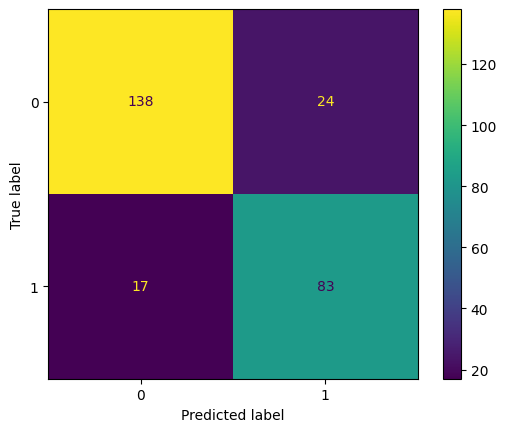

In [ ]:
show_results(y_test_titanic, predictions)

No geral, já se pode perceber que as métricas apresentam valores satisfatórios, sendo a precisão a menor delas.

In [ ]:
prob_arr = tree_brute.predict_proba(X_test_titanic)
for pred in prob_arr: print(pred, end=' ')

[0. 1.] [1. 0.] [1. 0.] [0. 1.] [0.5 0.5] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [0.5 0.5] [0. 1.] [0. 1.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [0. 1.] [0.5 0.5] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [1. 0.] [0. 1.] [1. 0.] [0. 1.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [1. 0.] [0. 1.] [0. 1.] [1. 0.] [1. 0.] [1

Nessa primeira árvore, não foi especificada a profundidade máxima , ou seja, seus ramos se estendem até não poderem mais. Desta forma, é como se cada uma das instâncias do Dataframe correspondessem a uma folha da árvore.


A fim de buscar melhorias no desempenho, pode-se alterar os parâmetros da nossa árvore e explorar as possibilidades de configuração.

### **Alterando a profundidade da árvore de decisão**

Inicialmente, configurou um limite de profundidade = 3.

Accuracy score: 0.8587786259541985
F1 score: 0.8102564102564104
Precision: 0.8315789473684211
recall: 0.79


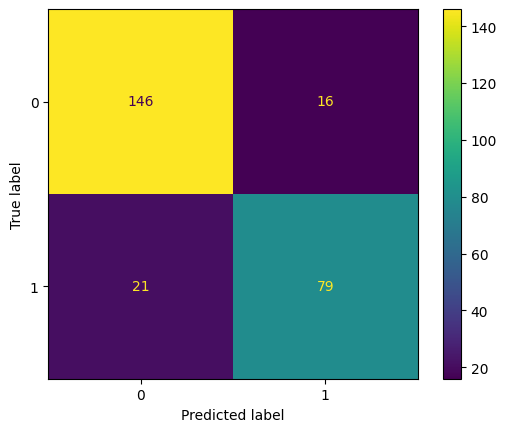

In [ ]:
tree_with_depth3 = DecisionTreeClassifier(max_depth=3)
tree_with_depth3 = tree_with_depth3.fit(X_train_titanic , y_train_titanic)
predictions_with_depth3 = tree_with_depth3.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_depth3)

Já percebe-se melhora em quase todas as métricas, inclusive a precisão, que foi a que mais melhorou. No entanto, o recall piorou.

Setando max_depth (a profundidade) para 5:

Accuracy score: 0.8549618320610687
F1 score: 0.8041237113402062
Precision: 0.8297872340425532
recall: 0.78


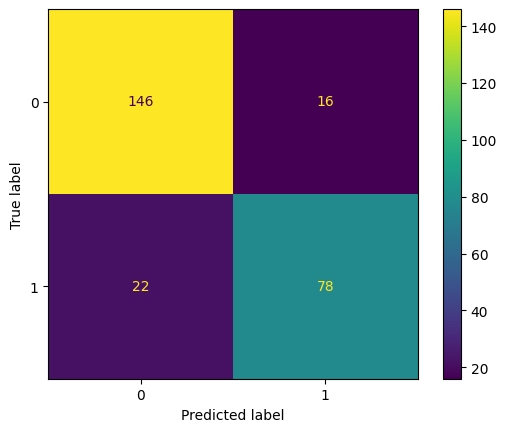

In [ ]:
tree_with_depth = DecisionTreeClassifier(max_depth=5)
tree_with_depth = tree_with_depth.fit(X_train_titanic , y_train_titanic)
predictions_with_depth = tree_with_depth.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_depth)

Com 5 de profundidade as métricas se mantiveram praticamente constantes.

Profundidade 7:

Accuracy score: 0.8473282442748091
F1 score: 0.801980198019802
Precision: 0.7941176470588235
recall: 0.81


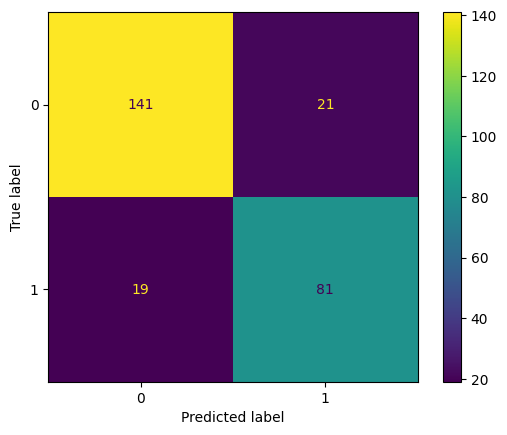

In [ ]:
tree_with_depth = DecisionTreeClassifier(max_depth=7)
tree_with_depth = tree_with_depth.fit(X_train_titanic , y_train_titanic)
predictions_with_depth = tree_with_depth.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_depth)

Para essa árvore, já se nota uma leve queda no desempenho, apenas recall aumenta.

### **Alterando a poda da árvore**

Nessa seção, testam-se diferentes valores (0.0001, 0.001 e 0.01) para o parâmetro ccp_alpha que define a poda da árvore.

Accuracy score: 0.8358778625954199
F1 score: 0.7922705314009661
Precision: 0.7663551401869159
recall: 0.82


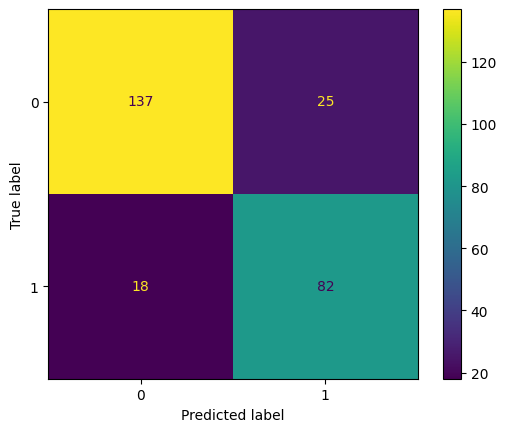

In [ ]:
tree_with_prune = DecisionTreeClassifier(ccp_alpha=0.0001)
tree_with_prune = tree_with_prune.fit(X_train_titanic , y_train_titanic)
predictions_with_prune = tree_with_prune.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_prune)

Accuracy score: 0.8435114503816794
F1 score: 0.7980295566502462
Precision: 0.7864077669902912
recall: 0.81


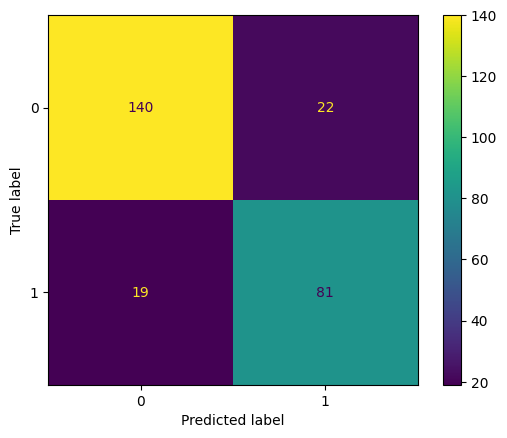

In [ ]:
tree_with_prune = DecisionTreeClassifier(ccp_alpha=0.001)
tree_with_prune = tree_with_prune.fit(X_train_titanic , y_train_titanic)
predictions_with_prune = tree_with_prune.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_prune)

Accuracy score: 0.8320610687022901
F1 score: 0.78
Precision: 0.78
recall: 0.78


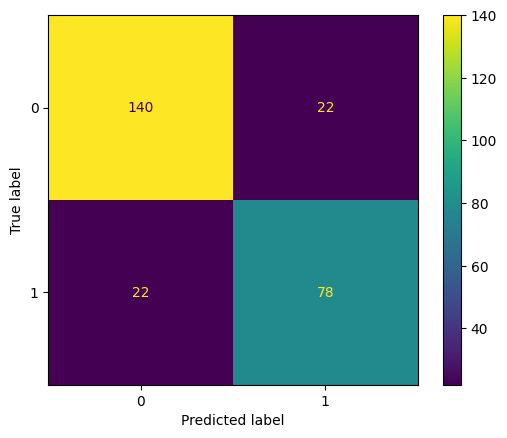

In [ ]:
tree_with_prune = DecisionTreeClassifier(ccp_alpha=0.1)
tree_with_prune = tree_with_prune.fit(X_train_titanic , y_train_titanic)
predictions_with_prune = tree_with_prune.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_prune)

Ao comparar a perfomance nos três casos, não percebe-se mudança relevante nos resultados.

### **Alterando o criterion:**

Accuracy score: 0.8587786259541985
F1 score: 0.8102564102564104
Precision: 0.8315789473684211
recall: 0.79


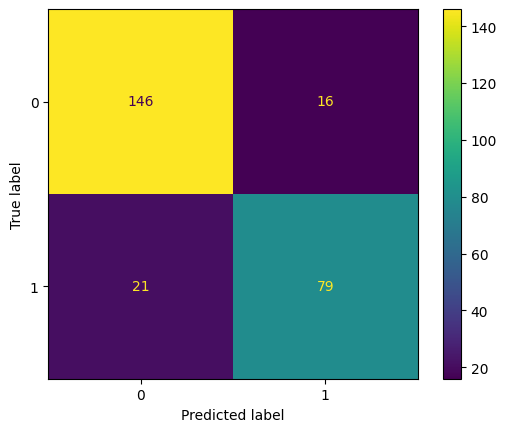

In [ ]:
tree_with_criterion = DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree_with_criterion = tree_with_criterion.fit(X_train_titanic , y_train_titanic)
predictions_with_criterion = tree_with_criterion.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_criterion)

Accuracy score: 0.851145038167939
F1 score: 0.802030456852792
Precision: 0.8144329896907216
recall: 0.79


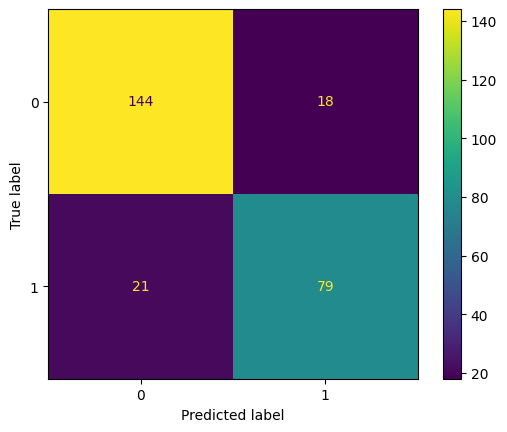

In [ ]:
tree_with_criterion = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_with_criterion = tree_with_criterion.fit(X_train_titanic , y_train_titanic)
predictions_with_criterion = tree_with_criterion.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_criterion)

Accuracy score: 0.8435114503816794
F1 score: 0.7897435897435898
Precision: 0.8105263157894737
recall: 0.77


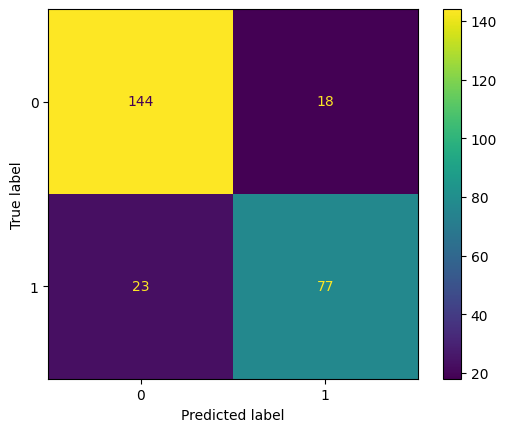

In [ ]:
tree_with_criterion = DecisionTreeClassifier(max_depth=7, criterion='entropy')
tree_with_criterion = tree_with_criterion.fit(X_train_titanic , y_train_titanic)
predictions_with_criterion = tree_with_criterion.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_criterion)

Alterando o criterion para "entropy", não se observa mudanças significativas.

### **Alterando o Class Weight**

Accuracy score: 0.8587786259541985
F1 score: 0.8140703517587939
Precision: 0.8181818181818182
recall: 0.81


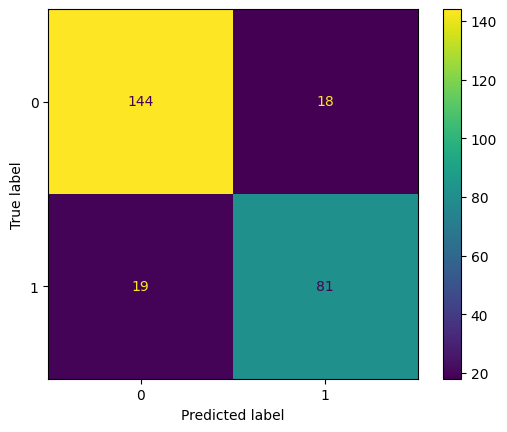

In [ ]:
tree_with_cw = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
tree_with_cw = tree_with_cw.fit(X_train_titanic , y_train_titanic)
predictions_with_cw = tree_with_cw.predict(X_test_titanic)
show_results(y_test_titanic, predictions_with_cw)

Alterando este parâmetro também não se observa mudanças significativas.

### **Conclusão**

A similaridade entre os resultados testados leva a conclusão de que a melhor configuração para a árvore tem profundidade máxima 3 e o restante de seus parâmetros padrões.

### **Curva de Aprendizado**

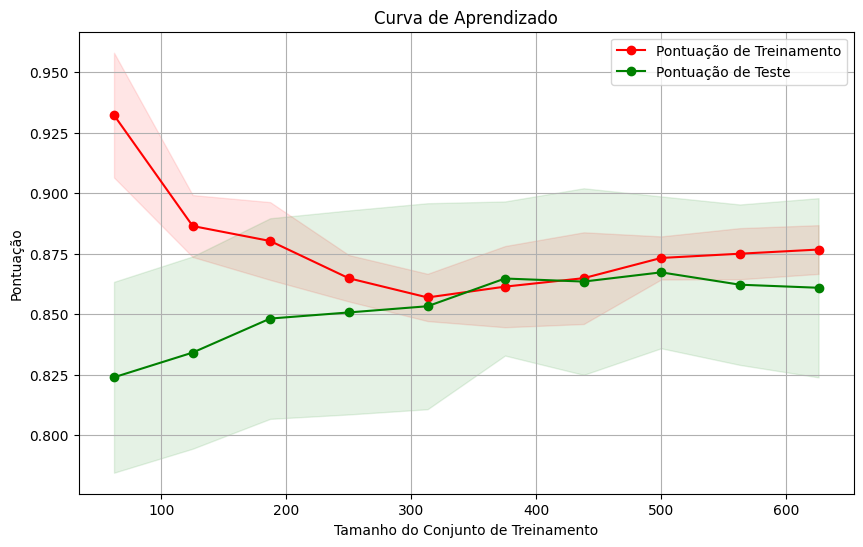

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X_train_iris , y_train_iris, X_test_iris, y_test_iris):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train_iris , y_train_iris, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizado")
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Pontuação")

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )

    plt.plot(
        train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação de Treinamento"
    )
    plt.plot(
        train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação de Teste"
    )

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plote a curva de aprendizado usando os conjuntos de treinamento e teste separados
plot_learning_curve(tree_with_depth3, X_train_titanic , y_train_titanic, X_test_titanic, y_test_titanic)

### **Feature Importance**

<Axes: >

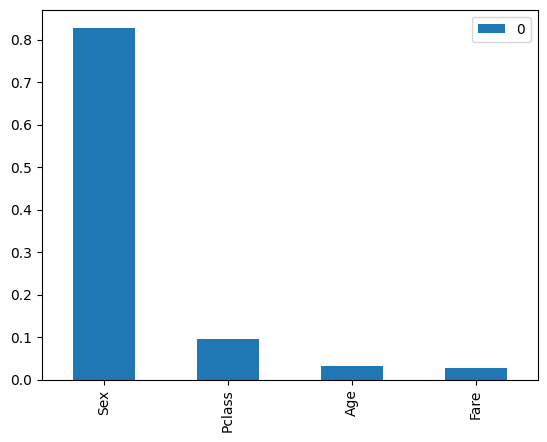

In [ ]:
feature_names = X_titanic_df_encoded.columns
tree_with_depth3.feature_importances_
feature_importance = pd.DataFrame(tree_with_depth3.feature_importances_, index = feature_names).sort_values(0, ascending=False)
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(4).plot(kind='bar')

# **IRIS SPECIES**

In [ ]:
%cd ..
%cd datasets
brute_df = pd.read_csv('IRIS.csv')

/content
/content/datasets


## **ANÁLISE EXPLORATÓRIA DOS DADOS**

Inicialmente, veremos como os dados estão dispostos no dataset original.

In [ ]:
brute_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Em seguida, podemos verificar quantos indivíduos de cada espécie de Íris temos no dataset.

In [ ]:
brute_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Agora, apresentaremos gráficos para facilitar a visualização da distribuição das variáveis no dataset, a fim de compreender as características do dataset.

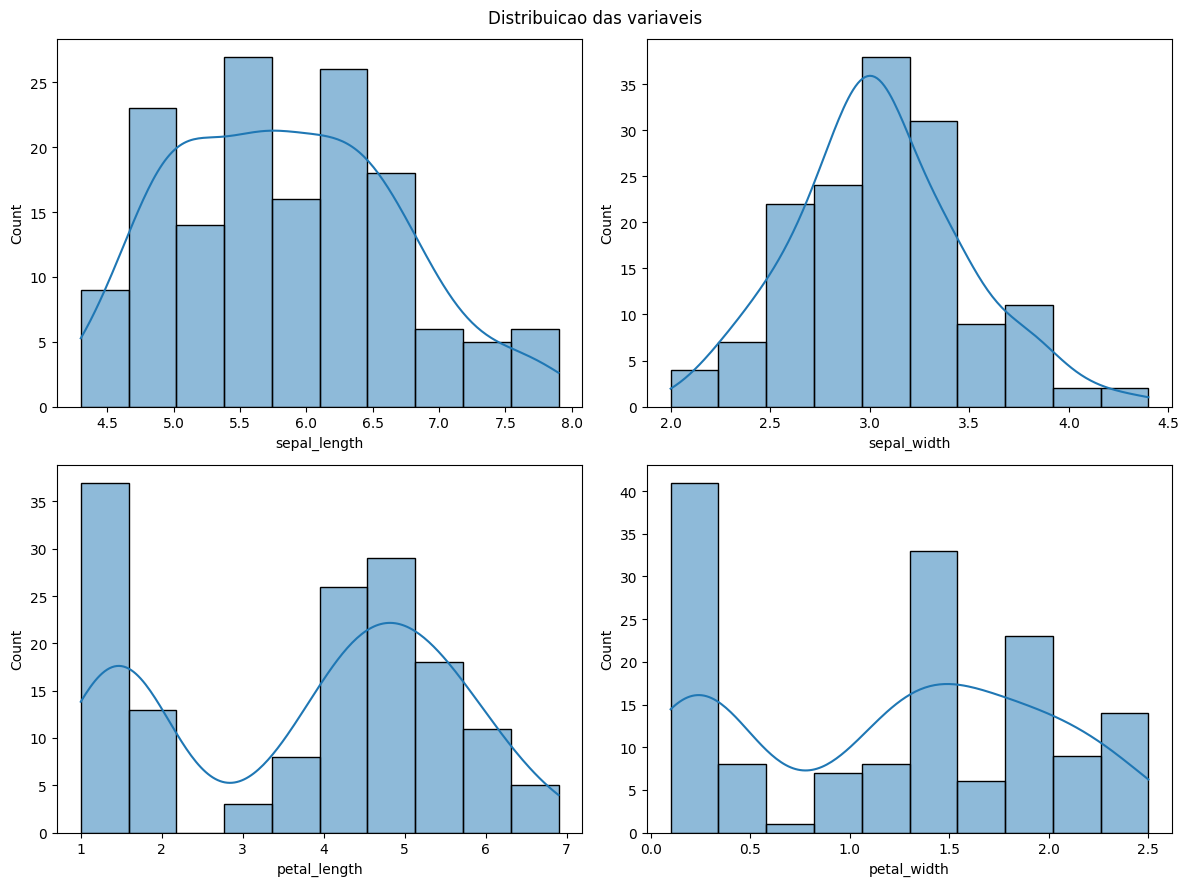

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,9))
fig.suptitle('Distribuicao das variaveis')

sns.histplot(ax=axes[0, 0], data=brute_df, x='sepal_length', bins=10, kde=True)
sns.histplot(ax=axes[0, 1], data=brute_df, x='sepal_width', bins=10, kde=True)
sns.histplot(ax=axes[1, 0], data=brute_df, x='petal_length', bins=10, kde=True)
sns.histplot(ax=axes[1, 1], data=brute_df, x='petal_width', bins=10, kde=True)

plt.tight_layout()

Abaixo, também com intuito de compreensão, faz-se um plot de cada um dos atributos do dataset de acordo com sua classificação. Dessa maneira, é possível visualizar intuitivamente como cada atributo influencia na classificação.

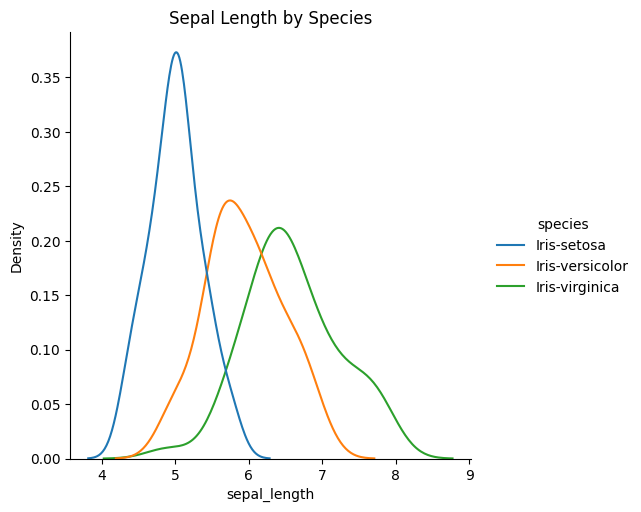

In [ ]:
sns.displot(data=brute_df, x="sepal_length", hue="species", kind="kde").set(title="Sepal Length by Species")


Percebe-se de cara que as sépalas mais curtas registradas no Dataset tende a ser de Iris-Setosa, já as mais longas de Iris-Virginica. Enquanto as de Iris Versicolor ficam no meio.

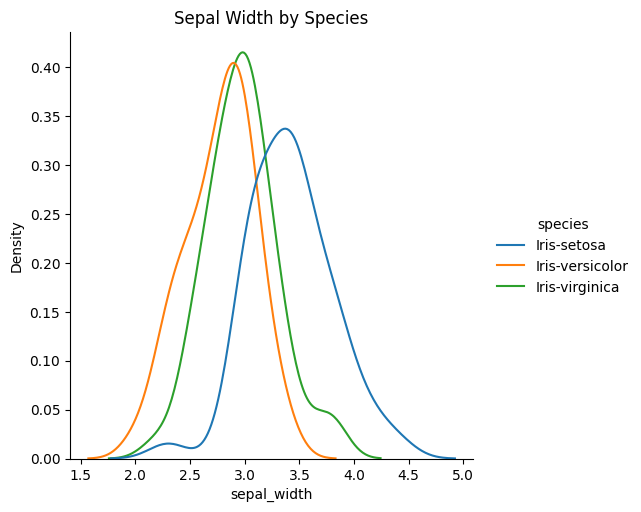

In [ ]:
sns.displot(data=brute_df, x="sepal_width", hue="species", kind="kde").set(title="Sepal Width by Species")


No que tange à largura das sépalas, percebe-se a Virginica e Versicolor tem tamanhos similares, enquanto a Setosa se destaca por ser mais grossa.

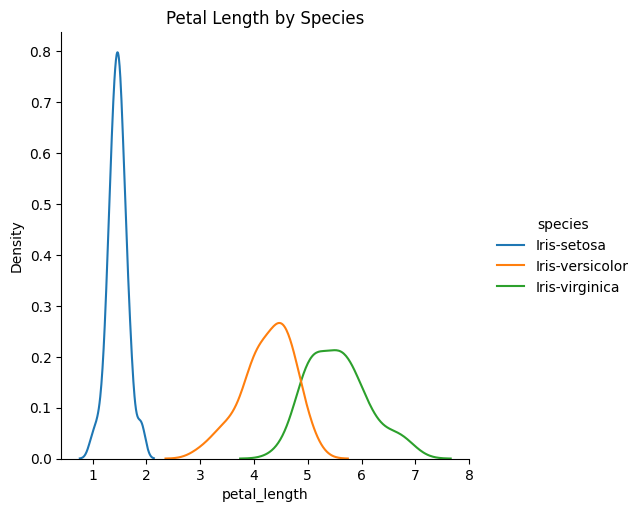

In [ ]:
sns.displot(data=brute_df, x="petal_length", hue="species", kind="kde").set(title="Petal Length by Species")


O comprimento da pétala é visivelmente um fator importante para a classificação.

Apenas a Setosa tem pétalas entre 1 e 2 cm.

Entre 2cm e 4 cm quase exclusivamente Versicolor.

Já de 5.5 cm para cima apenas Virginica.

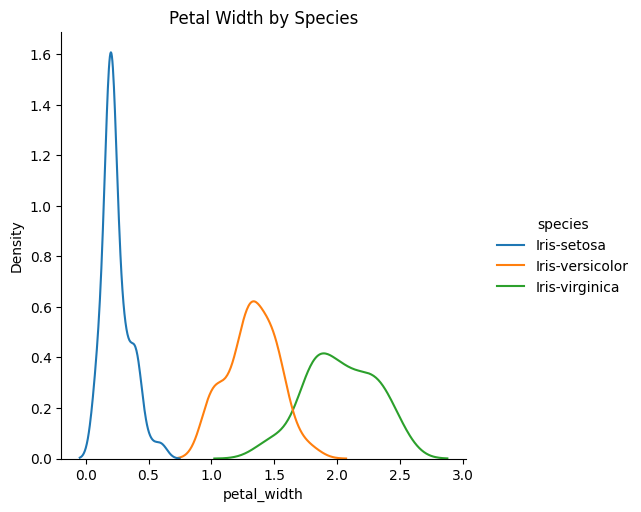

In [ ]:
sns.displot(data=brute_df, x="petal_width", hue="species", kind="kde").set(title="Petal Width by Species")

A largura das pétalas também é claramente um fator importante para a classificação.

Apenas a Setosa tem pétalas entre 0 e 0.75 cm.

Entre 0.75 cm e 1.25 cm quase exclusivamente Versicolor.

Já de 1.75cm para cima apenas Virginica.

## **ÁRVORE DE DECISÃO**

### **Configurações do modelo:**

In [ ]:
X = brute_df.iloc[:, :-1]

In [ ]:
X_brute = brute_df.iloc[:,:-1].values
Y_brute = brute_df.iloc[:,-1].values

Inicialmente, vamos separar os dados em conjuntos de treino e teste para o modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_brute, Y_brute , test_size=0.33, random_state=42)

Com os conjuntos separados, podemos então criar nosso modelo de árvore de decisão.

In [ ]:
tree_brute = DecisionTreeClassifier(random_state=0)
tree_brute = tree_brute.fit(X_train_iris , y_train_iris)

In [ ]:
predictions = tree_brute.predict(X_test_iris)

### **A árvore de decisão**

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [ ]:
def printTree(clf):
  fig = plt.figure(figsize=(15,10))
  _ = tree.plot_tree(clf,
                    feature_names=["sepal_length","sepal_width","petal_length","petal_width"],
                    class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                    filled=True)


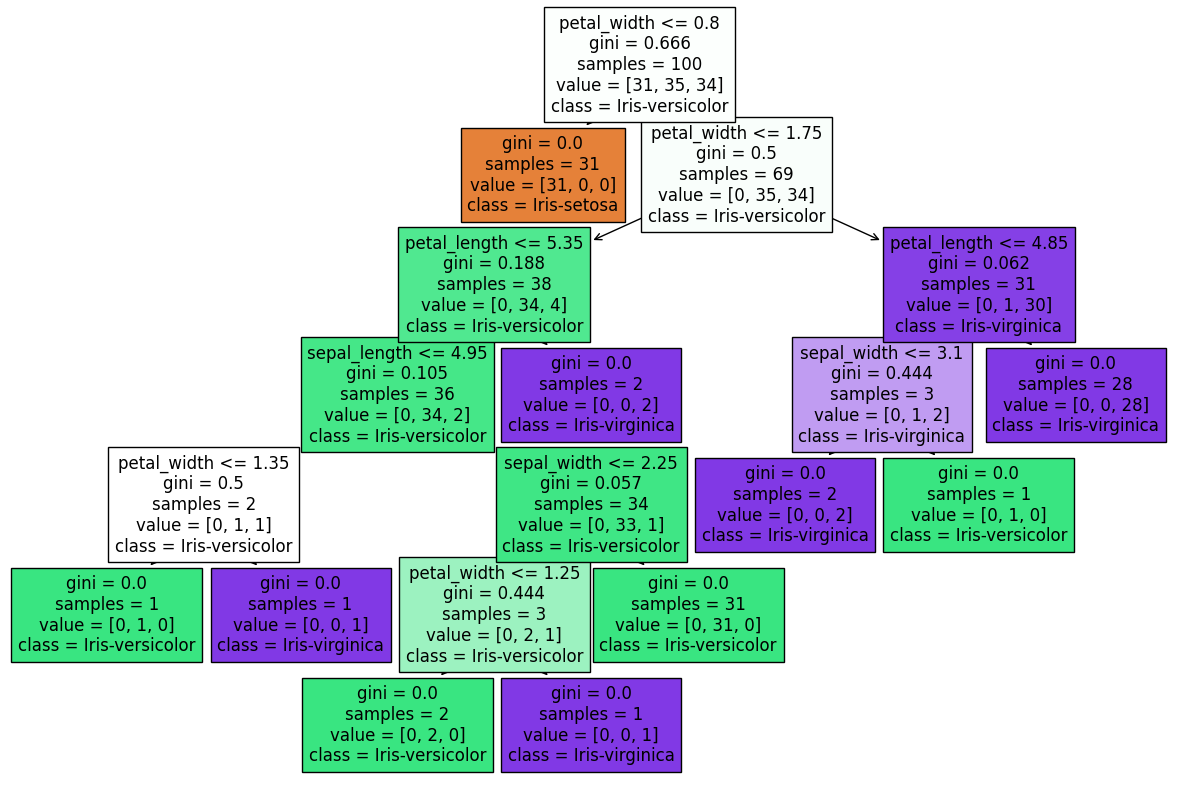

In [ ]:
from sklearn import tree
printTree(tree_brute)

### **Resultados do modelo**

In [ ]:
def show_results2(y_test_iris, predictions):
  print('Accuracy score:', accuracy_score(y_test_iris, predictions))

  disp = ConfusionMatrixDisplay(confusion_matrix(y_test_iris, predictions), display_labels=None)
  disp.plot()
  plt.show()

Accuracy score: 0.96


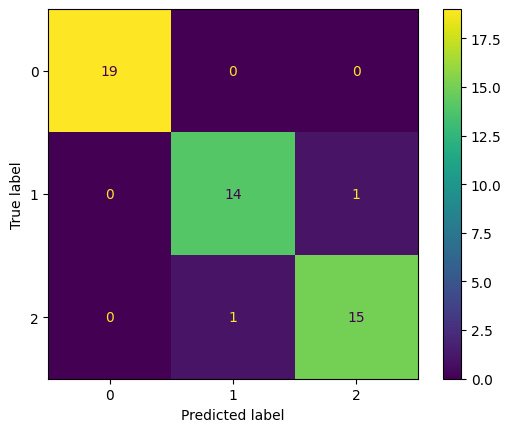

In [ ]:
show_results2(y_test_iris, predictions)

Como vemos a seguir, as probabilidades para cada amostra do conjunto de teste são sempre *0* ou *1*, pois a árvore cresceu até não haver mais possíveis divisões.

In [ ]:
tree_brute.predict_proba(X_test_iris)[:10] #Por causa do tamanho do array, optou-se por imprimir apenas 10 predições

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

Assim, podemos definir um critério de parada para o crescimento da árvore, como por exemplo, uma profundidade máxima:

In [ ]:
iris_with_depth = DecisionTreeClassifier(max_depth=4)
iris_with_depth = iris_with_depth.fit(X_train_iris , y_train_iris)
predictions_with_depth = iris_with_depth.predict(X_test_iris)

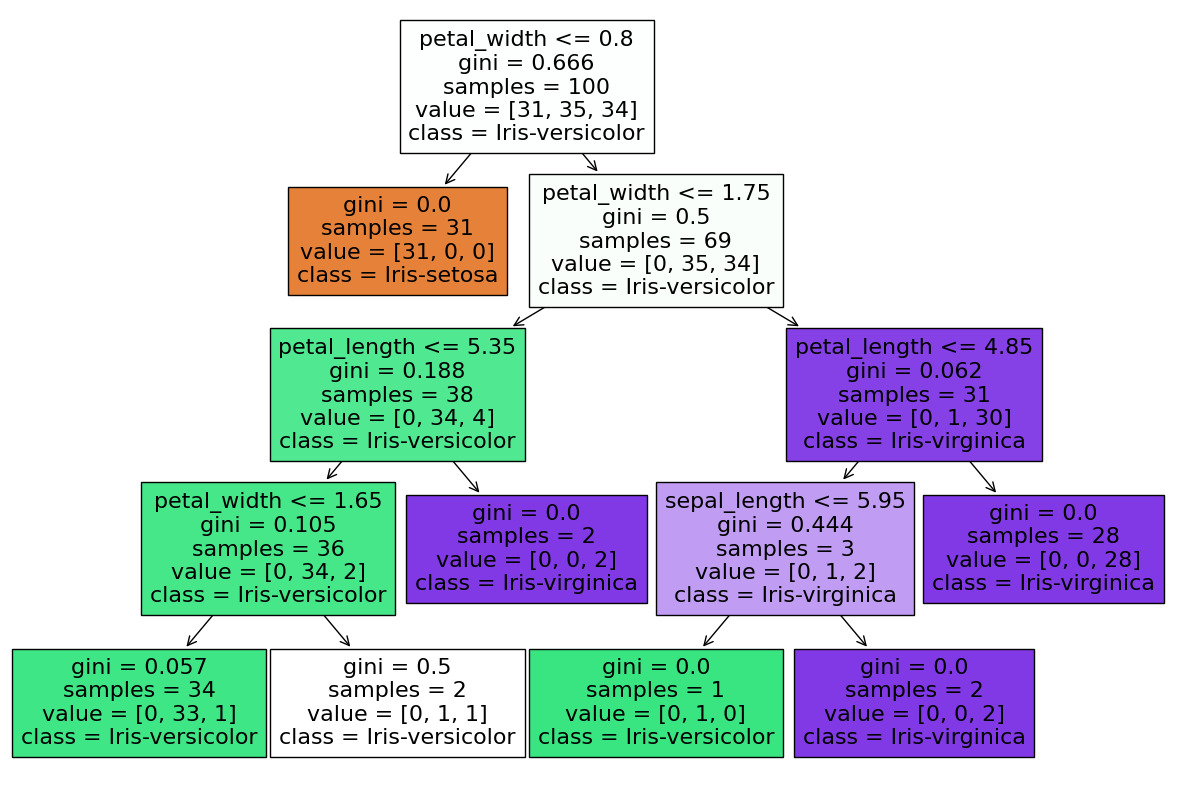

In [ ]:
printTree(iris_with_depth)

A diferença na conformação das duas árvores é clara. Nota-se que ao utilizar o parâmetro max_depth, a árvore se torna muito mais concisa, como é de se esperar.

In [ ]:
iris_with_depth.predict_proba(X_test_iris)[:10]

array([[0.        , 0.97058824, 0.02941176],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.97058824, 0.02941176],
       [0.        , 0.97058824, 0.02941176],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97058824, 0.02941176],
       [0.        , 0.        , 1.        ],
       [0.        , 0.97058824, 0.02941176],
       [0.        , 0.97058824, 0.02941176]])

Como podemos observar, houveram alterações nas probabilidades da nova árvore pois paramos o modelo antes de crescer tudo.

Agora, podemos ver a matrix de confusão dessa árvore:

Accuracy score: 0.98


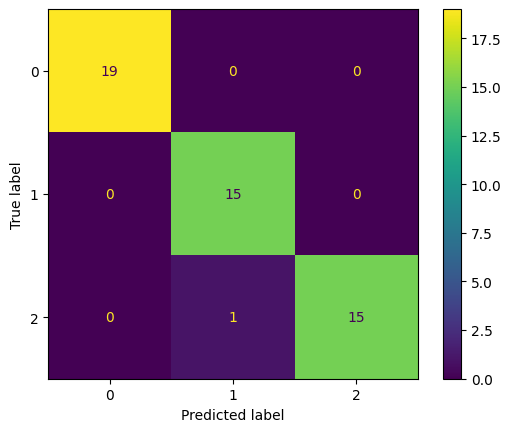

In [ ]:
show_results2(y_test_iris, predictions_with_depth)

Percebe-se uma melhora no modelo, com apenas uma instância classificada erroneamente. O que mostra que nesse caso, uma árvore mais simples melhor modela o problema.

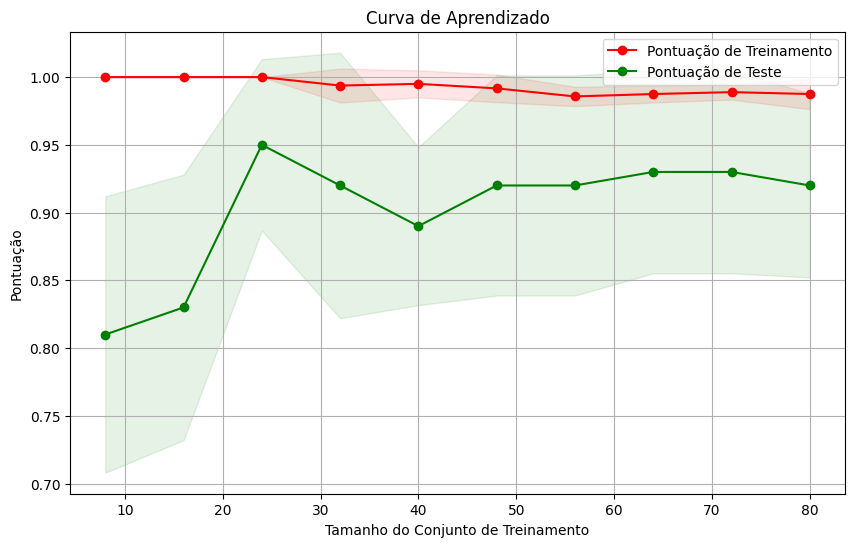

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X_train_iris , y_train_iris, X_test_iris, y_test_iris):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train_iris , y_train_iris, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizado")
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Pontuação")

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )

    plt.plot(
        train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação de Treinamento"
    )
    plt.plot(
        train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação de Teste"
    )

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plote a curva de aprendizado usando os conjuntos de treinamento e teste separados
plot_learning_curve(iris_with_depth, X_train_iris , y_train_iris, X_test_iris, y_test_iris)

<Axes: >

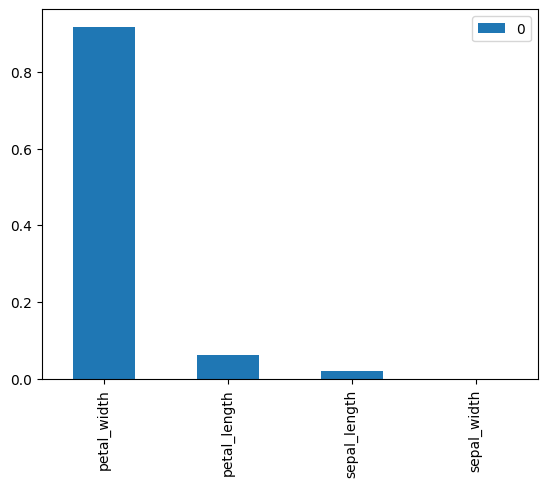

In [ ]:
# vendo a importancia de cada coluna

feature_names =brute_df.columns[:4]
iris_with_depth.feature_importances_
feature_importance = pd.DataFrame(iris_with_depth.feature_importances_, index = feature_names).sort_values(0, ascending=False)
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(4).plot(kind='bar')